# Questions

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

*Ans*: For matrix multiplication the number of:

* Multiplications:  k*m*n ( A single row of k elements in the first matrix it is multiplied with corresponing k elements of the columns of the second matrix m times. This process is iterated over n times corresponing to each row in the first matrix )

* Addition: (k-1)*m*n ( After a row of the first matrix is multiplied with corresponding elements of the second matrix resulting in k terms. These k terms are added using k-1 addition operations. This is first iterated for m columns of the second matrix then for n rows of the first matrix)



## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
import time
n=50
m=52
k=45


M1 = np.random.randint(1,10,size= (n,k))

M2 =np.random.randint(1,10,size = (k,m))

def matmul(M1=M1,M2=M2,n=n, m =m , k= k):

    multiplied = []
    for i in range(n):
        row=[]
        for j in range(m):
            a= 0
            for z in range(k):

                a += M1[i][z]*M2[z][j]
            row.append(a)
        multiplied.append(row)

    return multiplied

print(f"The matrix M1: {M1} and M2 {M2} ")

x= time.time()
print(matmul())
y= time.time()
print(f"The time taken without numpy : {y-x} seconds")

x = time.time()
print( np.matmul(M1,M2))
y= time.time()
print(f"The time taken with numpy : {y-x} seconds")




The matrix M1: [[4 1 5 ... 4 9 2]
 [2 1 5 ... 7 2 4]
 [6 2 2 ... 5 5 3]
 ...
 [4 7 7 ... 4 3 3]
 [2 1 8 ... 3 1 7]
 [8 7 1 ... 5 5 2]] and M2 [[7 5 2 ... 1 1 3]
 [3 8 3 ... 7 5 7]
 [2 8 3 ... 1 5 1]
 ...
 [5 2 1 ... 3 3 1]
 [7 8 8 ... 9 5 7]
 [9 6 2 ... 1 9 8]] 
[[934, 1261, 1022, 1173, 1138, 1250, 1037, 943, 1041, 1242, 1041, 990, 1178, 1075, 990, 1174, 1155, 1159, 1210, 986, 1268, 1082, 1179, 1192, 1151, 891, 1284, 1122, 1096, 1128, 1115, 1026, 1258, 1079, 1306, 1120, 916, 1110, 1024, 1142, 1285, 1206, 1042, 1028, 1108, 1190, 1082, 1022, 1078, 1179, 946, 1071], [1061, 1305, 1051, 1283, 1212, 1408, 1000, 1052, 1188, 1420, 1091, 1196, 1180, 1214, 1198, 1171, 1195, 1312, 1234, 1154, 1379, 1204, 1229, 1264, 1163, 1064, 1431, 1219, 1198, 1236, 1189, 1047, 1371, 1313, 1445, 1197, 1010, 1158, 1221, 1181, 1455, 1312, 1103, 1066, 1078, 1294, 1203, 1098, 1157, 1151, 1062, 1130], [1168, 1413, 1147, 1250, 1295, 1471, 1155, 1028, 1178, 1466, 1191, 1240, 1242, 1232, 1195, 1306, 1286, 1258, 1322, 1

From the results numpy is faster this is due to vectorized calculations of numpy arrays

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?



Finding the median of the array will require n/2 passes over the array. i.e Finding the n/2th largerst element in the array. If n is even then median will be the average of n/2th and (n/2) -1 th element otherwise the [n/2] th element. The time complexity of this soln will be $O(n^2)$

A better method can be first sorting the array then finding the median by finding the [n/2] th element. THe time complexity will be $O(nlogn)$


In [21]:

def find_median_method2(arr):  # finding median by sorting
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1 = n // 2
        mid2 = mid1 - 1
        return (sorted_arr[mid1] + sorted_arr[mid2]) / 2

arr=  np.random.randint(1,10,size=(11,))
print(find_median_method2(arr))

print(np.median(arr))

6
6.0


## 4. What is the gradient of the following function with respect to x and y?

$ x^2y + y^3sin(x)$



The partial derivative wrt x will be

$ \frac{\partial f}{\partial x}  = 2xy+ y^3cos(x)$

The partial dderivative wrt y will be

$ \frac{\partial f}{\partial y} = x^2 + 3y^2sin(x)$

## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [7]:
import jax
import jax.numpy as jnp
from jax import random

def my_function(x, y):
    return (x**2)*y + (y**3)*jnp.sin(x)


def analytical_gradient(x, y):
    df_dx = 2 * x*y + (y**3)*jnp.cos(x)
    df_dy = (x**2)+ 3*(y**2)*jnp.sin(x)
    return df_dx, df_dy


grad_fn = jax.grad(my_function, argnums=(0, 1))

key = random.PRNGKey(42)
x_val = random.normal(key)
y_val = random.normal(key)


analytical_grad = analytical_gradient(x_val, y_val)


jax_grad = grad_fn(x_val, y_val)


print("Analytical Gradient:", analytical_grad)
print("JAX Gradient:", jax_grad)


Analytical Gradient: (Array(0.062042, dtype=float32), Array(0.01531953, dtype=float32))
JAX Gradient: (Array(0.062042, dtype=float32), Array(0.01531953, dtype=float32))


## 6. Use sympy to confirm that you obtain the same gradient analytically.

In [10]:
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')

f = (x**2)*y + (y**3)*sp.sin(x)

derivative_x = sp.diff(f,x)

print(f"derivative wrt x :{derivative_x}")

derivative_y = sp.diff(f,y)

print(f"derivative wrt y :{derivative_y}")



point = {x:x_val, y:y_val}

print(f"The partial derivative of f with respect to x at point  is:", derivative_x.subs(point))
print(f"The partial derivative of f with respect to y at point  is:", derivative_y.subs(point))



derivative wrt x :2*x*y + y**3*cos(x)
derivative wrt y :x**2 + 3*y**2*sin(x)
The partial derivative of f with respect to x at point  is: 0.0620420015797795
The partial derivative of f with respect to y at point  is: 0.0153195319815740


## 7.Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [11]:
nested_dict = data = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }
        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }

        }
    },
    2023: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }
        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }

        }
    },
    2024: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }

        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }

        }
    },
    2025: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }

        },
        'Branch 2': {
            'Roll Number': 1,
            'Name': 'N',
            'Marks': {
                'Maths': 100,
                'English': 70
            }

        }
    }
}


## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [20]:
class Student():

    def __init__(self,name,roll_no, marks):

        self.name = name
        self.roll_no= roll_no
        self.marks = marks


class branch():
    def __init__(self, branch, students_list:list # list containing student objects
                 ):
        self.branch = branch
        self.students = students_list

class year():

    def __init__(self, year_name, branch):

        self.year = year_name
        self.branch = branch

student_1 = Student('Dewansh',1,{'Eng':13,'Maths':34})
student_2 = Student('Laqshya',1,{'Eng':24,'Maths':34})
student_3 = Student('Vraj',1,{'Eng':35,'Maths':34})

branch_1 = branch('CSE',[student_1,student_3])

branch_2 = branch('EE',[student_2])

year_2023 = year(2023,[branch_1,branch_2])

year_data = [year_2023]





## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

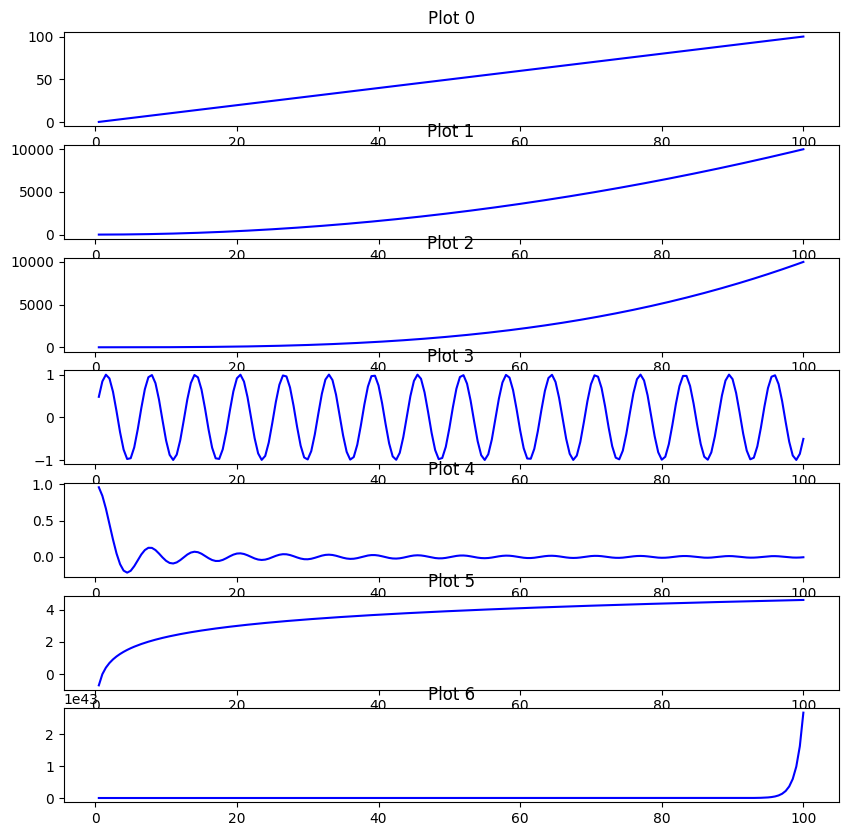

In [15]:
import matplotlib.pyplot as plt
import numpy as np

X  = np.arange(0.5,100.5,0.5)

y = [X, X**2, (X**3)/100 , np.sin(X), np.sin(X)/X , np.log(X), np.exp(X)]

fig, axes = plt.subplots(7,1,figsize= (10,10))

axes = axes.flatten()

for i ,ax in enumerate(axes):

    ax.plot(X, y[i], color = 'b')
    ax.set_title(f"Plot {i}")






## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean

In [16]:
import numpy as np
import pandas as pd
np.random.seed(42)   # for regeneratable results

matrix = np.random.uniform(1,2,size= (20,5))
print(f"The shape of the matrix is {matrix.shape}")

df = pd.DataFrame(matrix, columns= ["a","b","c","d","e"])

sde = df.std().idxmax()

print(f"The column with highest standard deviation is {sde} of {max(list(df.std()))}")


min_mean = df.mean(axis=1).idxmin()

print(f"The row index with lowest mean {min_mean}  of {min(list(df.mean()))}")




The shape of the matrix is (20, 5)
The column with highest standard deviation is c of 0.31862833120007994
The row index with lowest mean 11  of 1.4182459349790417


## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [17]:
# Using the dataframe created in above


df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

print(f"THe matrix after adding the new column")
print(df)
print()
df['g'] = ["LT8" if df['f'][i]<8 else "GT8" for i in range(len(df))]

grouped_object = df[['g','f']].groupby('g').std()

print(f"The standard deviation of column f whose corresponfing g values is GT8 {grouped_object['f']['GT8']}")

print(f"The standard deviation of column f whose corresponfing g values is LT8 {grouped_object['f']['LT8']}")

THe matrix after adding the new column
           a         b         c         d         e         f
0   1.374540  1.950714  1.731994  1.598658  1.156019  7.811925
1   1.155995  1.058084  1.866176  1.601115  1.708073  7.389442
2   1.020584  1.969910  1.832443  1.212339  1.181825  7.217101
3   1.183405  1.304242  1.524756  1.431945  1.291229  6.735577
4   1.611853  1.139494  1.292145  1.366362  1.456070  6.865923
5   1.785176  1.199674  1.514234  1.592415  1.046450  7.137949
6   1.607545  1.170524  1.065052  1.948886  1.965632  7.757638
7   1.808397  1.304614  1.097672  1.684233  1.440152  7.335069
8   1.122038  1.495177  1.034389  1.909320  1.258780  6.819704
9   1.662522  1.311711  1.520068  1.546710  1.184854  7.225866
10  1.969585  1.775133  1.939499  1.894827  1.597900  9.176944
11  1.921874  1.088493  1.195983  1.045227  1.325330  6.576907
12  1.388677  1.271349  1.828738  1.356753  1.280935  7.126452
13  1.542696  1.140924  1.802197  1.074551  1.986887  7.547255
14  1.772245  1.

## 12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting is a feature used in numpy to do element wise operations such as multiplication and addition on matrices with differnet sizes

In [18]:
arr1 = np.random.randint(1,5,size=(2,3))

print(arr1)
print()

arr2 = np.random.randint(1,5,size=(3,))
print(arr2)

print()
print(arr1+ arr2) # arr2 shape got changed according to the size of arr1 to perform element wise opeartions
print()
# Same can be done using multiplication

print(arr1*arr2)

[[3 4 3]
 [1 4 1]]

[4 4 2]

[[7 8 5]
 [5 8 3]]

[[12 16  6]
 [ 4 16  2]]


## 13.  Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

Ans : The use of the argmin function in the numpy module is to return the index of the minimum value element in an numpy array (for a one dimentional array)

In [19]:
import sys
arr = np.array([32,12,46,23,4647,42,757,43244,456547,233,33,566,21,0,])


def argmin(arr):

    min = sys.maxsize
    n = len(arr)
    ind = n
    for i in range(n):

        if (arr[i]<min):
            min = arr[i]
            ind= i
    return i

print("The index of the minimum element using our argmin funtion",argmin(arr))

print("The index of the minimum element using numpy's argmin function" , np.argmin(arr))





The index of the minimum element using our argmin funtion 13
The index of the minimum element using numpy's argmin function 13
